In [1]:
import pandas as pd
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw, AllChem
from rdkit import DataStructs

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
PDBbind_minimized_intersected_Uw_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/index/For_ML/PIP.csv', sep='\t')
len(PDBbind_minimized_intersected_Uw_df)

5907

In [2]:
PDBbind_v18 = pd.read_csv('INDEX_general_PL_data.2018.grepped', sep=' ', names=['pdb_id', '-logAffi'])
PDBbind_v18

,pdb_id,-logAffi
0,3zzf,0.40
1,3gww,0.45
2,1w8l,0.49
3,3fqa,0.49
4,1zsb,0.60
...,...,...
16146,7cpa,13.96
16147,2xuf,14.39
16148,1avd,15.00
16149,2xui,15.00


# PDBbind original

In [3]:
PDBbind_v19 = pd.read_csv('/pubhome/xli02/Downloads/dataset/PDBbind/PDBbind_v2019/INDEX_general_PL_data_grepped.2019', sep='\t')
PDBbind_v19

,pdb_id,-logAffi
0,3zzf,0.40
1,3gww,0.45
2,1w8l,0.49
3,3fqa,0.49
4,1zsb,0.60
...,...,...
17674,7cpa,13.96
17675,2xuf,14.39
17676,1avd,15.00
17677,2xui,15.00


In [13]:
17679 - 16151

1528

In [23]:
len(PDBbind_v18[~PDBbind_v18['pdb_id'].isin(PDBbind_v19['pdb_id'])])

14

In [4]:
PDBbind_v18[~PDBbind_v18['pdb_id'].isin(PDBbind_v19['pdb_id'])]

,pdb_id,-logAffi
3332,6b8i,4.72
6334,1zlw,5.89
7161,1zlv,6.15
7393,1kdv,6.22
7929,1kdy,6.38
8947,1qy5,6.70
9029,5v8n,6.70
9824,1zls,7.00
9825,1zlu,7.00
10683,1ke1,7.25


In [22]:
len(PDBbind_v19[PDBbind_v19['pdb_id'].isin(PDBbind_v18['pdb_id'])])

16137

In [9]:
PDBbind_hold_out_2019 = PDBbind_v19[~PDBbind_v19['pdb_id'].isin(PDBbind_v18['pdb_id'])]
# PDBbind_hold_out_2019.to_csv('PDBbind_hold_out_2019_original.csv', sep='\t', index=False)
PDBbind_hold_out_2019

,pdb_id,-logAffi
26,5oxm,1.30
46,5vqe,1.49
72,6cex,1.70
73,6cf5,1.70
100,1mwt,1.88
...,...,...
17617,5qil,11.52
17633,6cdj,11.70
17643,6e9a,11.92
17650,6b5m,12.00


In [7]:
pdbbind_v19_year = pd.read_csv('/pubhome/xli02/project/PLIM/analysis/20220829_paper/distribution/test.csv', sep=' ', header=None, names=['pdb_id', 'year'])
pdbbind_v19_year

,pdb_id,year
0,3zzf,2012
1,3gww,2009
2,1w8l,2004
3,3fqa,2009
4,1zsb,1996
...,...,...
17674,7cpa,1994
17675,2xuf,2010
17676,1avd,1994
17677,2xui,2010


In [8]:
pdbbind_v19_year[pdbbind_v19_year['year'] > 2017]['pdb_id']

,pdb_id,year
26,5oxm,2018
46,5vqe,2018
72,6cex,2018
73,6cf5,2018
115,5oxn,2018
...,...,...
17617,5qil,2018
17633,6cdj,2018
17643,6e9a,2018
17650,6b5m,2018


In [12]:
not_2018 = PDBbind_hold_out_2019[~PDBbind_hold_out_2019['pdb_id'].isin(pdbbind_v19_year[pdbbind_v19_year['year'] > 2017]['pdb_id'])]
not_2018

,pdb_id,-logAffi
100,1mwt,1.88
197,5fsb,2.22
269,5fsc,2.36
863,5ijr,3.20
1231,5mby,3.51
...,...,...
16984,5llo,9.40
17089,5llc,9.52
17387,5llh,10.17
17402,5lle,10.22


# PDBbind_minimized

In [16]:
PDBbind_minimized = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/index/For_ML/PDBbind_dealt.csv', sep='\t')
PDBbind_minimized

,pdb_id,-logAffi
0,3zzf,0.40
1,3gww,0.45
2,1w8l,0.49
3,3fqa,0.49
4,1zsb,0.60
...,...,...
17174,7cpa,13.96
17175,2xuf,14.39
17176,1avd,15.00
17177,2xui,15.00


In [17]:
17179 - 16151

1028

In [24]:
PDBBind_v18_minimized = PDBbind_minimized[PDBbind_minimized['pdb_id'].isin(PDBbind_v18['pdb_id'])]
PDBBind_v18_minimized.to_csv('minimized/PDBbind_v18_minimized.csv', sep='\t', index=False)
len(PDBBind_v18_minimized)

15666

In [25]:
PDBbind_hold_out_2019_minimized = PDBbind_minimized[~PDBbind_minimized['pdb_id'].isin(PDBbind_v18['pdb_id'])]
# PDBbind_hold_out_2019_minimized.to_csv('minimized/PDBbind_hold_out_2019_minimized.csv', sep='\t', index=False)
# PDBbind_hold_out_2019_minimized
# # 会有PLANet没有的PDB IDs

,pdb_id,-logAffi
26,5oxm,1.30
46,5vqe,1.49
70,6cex,1.70
71,6cf5,1.70
96,1mwt,1.88
...,...,...
17101,6dh5,11.30
17120,5qil,11.52
17136,6cdj,11.70
17145,6e9a,11.92


In [30]:
PDBbind_hold_out_2019_minimized[~PDBbind_hold_out_2019_minimized['pdb_id'].isin(PDBbind_hold_out_2019['pdb_id'])]

,pdb_id,-logAffi


# PLANet

In [31]:
PLANet_Uw_dealt_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/index/20220524_other_files/PLANet_Uw_dealt_median.csv', sep='\t')
PLANet_Uw_dealt_df

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,Diff_an,Part_fix,Total_sampled_num,Similar_compnd_conform,Total_delta,Lig_delta,Core_RMSD,MolWt,MCS_smarts,target_compnd
0,CHEMBL1075026_1swr_CHEMBL857,14.000000,CHEMBL1075026,1swr,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,CHEMBL857,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,1.000000,...,0,No,6,CHEMBL857-0-0,-51.95,-3.19,0.283368,244.088163,[#6](-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]1...,CHEMBL1075026_CHEMBL857
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL257158,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,1.000000,...,0,No,6,CHEMBL257158-1-0,22.72,-9.82,0.259684,219.056529,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL257158
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL403756,CC1=N[C@H]2[C@H](O[C@H](CO)[C@H](O)[C@@H]2O)S1,14,1.000000,...,0,No,6,CHEMBL403756-0-0,11.87,-3.73,0.667258,219.056529,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL403756
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL404356,CC1=N[C@@H]2[C@@H](O)[C@H](O)[C@@H](CO)O[C@]2(...,15,0.824870,...,1,No,6,CHEMBL404356-3-0,26.98,-11.12,0.352828,233.072179,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL404356
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781,CHEMBL1075027,1jak,CC(=O)N[C@H]1[NH2+]C[C@H](CO)[C@H](O)[C@@H]1O,14,CHEMBL253537,CC(=O)N[C@@H]1NC[C@H](CO)[C@H](O)[C@@H]1O,14,1.000000,...,0,No,6,CHEMBL253537-0-0,-117.77,-16.52,0.342688,204.111007,[#6]1(-&@[#7]-&@[#6]-&@[#6](-&@[#6](-&@[#6]-&@...,CHEMBL1075027_CHEMBL253537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69811,CHEMBL6166_4zk5_CHEMBL3623138,8.431798,CHEMBL6166,4zk5,Nc1ncc(C(=O)NC2CN(C(=O)C3C=C3)C2)c2ccc(-c3cccc...,30,CHEMBL3623138,Nc1ncc(C(=O)NC2CN(C(=O)C3CC3)C2)c2ccc(-c3cccc(...,30,0.966205,...,2,No,6,CHEMBL3623138-2-0,-33.82,-5.46,0.307816,405.160103,[#6]1:&@[#6](:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1-...,CHEMBL6166_CHEMBL3623138
69812,CHEMBL6166_4zk5_CHEMBL3623139,8.795880,CHEMBL6166,4zk5,Nc1ncc(C(=O)NC2CN(C(=O)C3C=C3)C2)c2ccc(-c3cccc...,30,CHEMBL3623139,CNC(=O)N1CC(NC(=O)c2cnc(N)c3nc(-c4cccc(F)c4)cc...,29,0.920581,...,3,No,6,CHEMBL3623139-4-0,-36.61,-5.03,0.329178,394.155352,[#6](=&!@[#8])-&!@[#7]1-&@[#6]-&@[#6](-&@[#6]-...,CHEMBL6166_CHEMBL3623139
69813,CHEMBL6166_5di1_CHEMBL3754283,7.588909,CHEMBL6166,5di1,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,CHEMBL3754283,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,1.000000,...,0,No,6,CHEMBL3754283-3-0,-38.84,-3.92,0.611367,340.088163,[#6]1(-&!@[#6]2:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&...,CHEMBL6166_CHEMBL3754283
69814,CHEMBL6166_5di1_CHEMBL3754304,6.285285,CHEMBL6166,5di1,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,CHEMBL3754304,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(C(N)=O)cc3)cnc2N)cc1,26,0.838403,...,3,No,6,CHEMBL3754304-2-0,-23.64,-3.86,0.614969,367.099062,[#6]1(-&!@[#6]2:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@...,CHEMBL6166_CHEMBL3754304


In [35]:
PLANet_v18 = PLANet_Uw_dealt_df[PLANet_Uw_dealt_df['Cry_lig_name'].isin(PDBBind_v18_minimized['pdb_id'])]
PLANet_v18[['unique_identify', '-logAffi']].to_csv('minimized/PLANet_v18.csv', sep='\t', index=False)
len(PLANet_v18)

63933

In [47]:
len(set(PLANet_v18['Cry_lig_name']))

5422

In [38]:
len(PLANet_Uw_dealt_df[PLANet_Uw_dealt_df['Cry_lig_name'].isin(PDBbind_hold_out_2019_minimized['pdb_id'])])

5883

In [36]:
PLANet_hold_out_2019 = PLANet_Uw_dealt_df[~PLANet_Uw_dealt_df['Cry_lig_name'].isin(PDBBind_v18_minimized['pdb_id'])]
PLANet_hold_out_2019[['unique_identify', '-logAffi']].to_csv('minimized/PLANet_hold_out_2019.csv', sep='\t', index=False)
len(PLANet_hold_out_2019)

5883

In [50]:
len(set(PLANet_hold_out_2019['Cry_lig_name']))

485

# PDBbind_v18_subset

In [51]:
PDBbind_v18_subset = PDBBind_v18_minimized[PDBBind_v18_minimized['pdb_id'].isin(PLANet_v18['Cry_lig_name'])]
PDBbind_v18_subset.to_csv('minimized/PDBbind_subset/PDBbind_v18_subset.csv', sep='\t', index=False)
PDBbind_v18_subset

,pdb_id,-logAffi
15,3fl9,1.11
38,2hdq,1.40
42,1utp,1.44
44,1tnk,1.49
73,2hdr,1.72
...,...,...
17151,4n70,12.00
17155,3o9h,12.10
17158,3o9g,12.30
17160,1q83,12.39


# PDBbind_hold_out_2019_subset

In [53]:
PDBbind_hold_out_2019_subset = PDBbind_hold_out_2019_minimized[PDBbind_hold_out_2019_minimized['pdb_id'].isin(PLANet_hold_out_2019['Cry_lig_name'])]
PDBbind_hold_out_2019_subset.to_csv('minimized/PDBbind_subset/PDBbind_hold_out_2019_subset.csv', sep='\t', index=False)
PDBbind_hold_out_2019_subset

,pdb_id,-logAffi
168,6gmx,2.17
242,6gmq,2.30
652,5ye8,3.00
655,6ftz,3.00
666,6f6n,3.02
...,...,...
17025,6h5w,10.80
17032,6h5x,10.82
17049,5nn0,10.96
17073,5llg,11.13


In [14]:
PDBbind_hold_out_2019_subset=pd.read_csv('minimized/PDBbind_subset/PDBbind_hold_out_2019_subset.csv', sep='\t')

# 计算相似性

In [57]:
pdbbind_dir = '/pubhome/xli02/Downloads/dataset/PDBbind'
# PLANet_Uw_dealt_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/index/20220524_other_files/PLANet_Uw_dealt_median.csv', sep='\t')
# len(PLANet_Uw_dealt_df)

In [40]:
def obtain_fps(data_df, dataset_name):
    mols = []
    mol_fps = []
    skipped_mols = []
    for row in data_df.itertuples():
        if 'pdb_id' in data_df.columns.values:
            uniq_id = row.pdb_id
            lig_file = f'{pdbbind_dir}/PDBbind_v2019/general_structure_only/{uniq_id}/{uniq_id}_ligand.smi'
            if not Path(lig_file).exists():
                print(f'{uniq_id} of PDBbind not exsits, skipped.')
                skipped_mols.append(uniq_id)
                continue
            compnd_mol = Chem.SmilesMolSupplier(lig_file, delimiter='\t', titleLine=False)[0]
        else:
            uniq_id = row.unique_identify
            if '_' in uniq_id:
                compnd_smi = PLANet_Uw_dealt_df[PLANet_Uw_dealt_df['unique_identify']==uniq_id]['Similar_compnd_smiles'].values[0]
                compnd_mol = Chem.MolFromSmiles(compnd_smi)
            else:
                lig_file = f'{pdbbind_dir}/PDBbind_v2019/general_structure_only/{uniq_id}/{uniq_id}_ligand.smi'
                if not Path(lig_file).exists():
                    print(f'{uniq_id} of PDBbind not exsits, skipped.')
                    skipped_mols.append(uniq_id)
                    continue
                compnd_mol = Chem.SmilesMolSupplier(lig_file, delimiter='\t', titleLine=False)[0]
        if compnd_mol is None:
            print(f'For compounds in {dataset_name}, {uniq_id} cannot be read by rdkit, skipped.')
            skipped_mols.append(uniq_id)
            continue
        compnd_mol.SetProp('_Name', uniq_id)
        mols.append(compnd_mol)
        mol_fps.append(rdMolDescriptors.GetMorganFingerprintAsBitVect(compnd_mol,2))
    return mols, mol_fps


def calculate_simi(mols_1, mol_fps_1, affi_df_1, mols_2, mol_fps_2, affi_df_2, set_name_1, set_name_2):
    max_simi_for_mols_1 = []
    cols = [f'{set_name_1}_cpnd_name', f'{set_name_1}_cpnd_affi', f'{set_name_1}_cpnd_smiles', f'{set_name_2}_cpnd_name', f'{set_name_2}_cpnd_affi', f'{set_name_2}_cpnd_smiles', 'similarity']
    lst = []
    for i, mol in enumerate(mols_1):
        simi_list = DataStructs.BulkTanimotoSimilarity(mol_fps_1[i], mol_fps_2)
        mol_name = mol.GetProp('_Name')
        for j,simi in enumerate(simi_list):
            if simi == 1:
                if 'pdb_id' in affi_df_1.columns.values:
                    mol_affi = affi_df_1[affi_df_1['pdb_id']==mol_name]['-logAffi'].values[0]
                else:
                    mol_affi = affi_df_1[affi_df_1['unique_identify']==mol_name]['-logAffi'].values[0]
                mol_smiles = Chem.MolToSmiles(mol)
                mol_2_name = mols_2[j].GetProp('_Name')
                if 'pdb_id' in affi_df_2.columns.values:
                    mol_2_affi = affi_df_2[affi_df_2['pdb_id']==mol_2_name]['-logAffi'].values[0]
                else:
                    mol_2_affi = affi_df_2[affi_df_2['unique_identify']==mol_2_name]['-logAffi'].values[0]
                mol_2_smiles = Chem.MolToSmiles(mols_2[j])
                lst.append([mol_name, mol_affi, mol_smiles, mol_2_name, mol_2_affi, mol_2_smiles, simi])
        max_simi = max(simi_list)
        max_simi_for_mols_1.append(max_simi)
    out_dir = f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/{set_name_2}_in_{set_name_1}' #
    if not Path(out_dir).exists():
        Path(out_dir).mkdir()
    simi_1_df = pd.DataFrame(lst, columns=cols)
    simi_1_df.to_csv(f'{out_dir}/simi_1.csv', sep='\t', index=False)
    return max_simi_for_mols_1

# PDBbind_v18_subset

In [54]:
len(PDBbind_v18_subset)

5422

In [ ]:
PDBbind_v18_subset_mols, PDBbind_v18_subset_mol_fps = obtain_fps(PDBbind_v18_subset, 'PDBbind_v18_subset')

In [67]:
len(PDBbind_v18_subset_mols)

5401

# PDBbind_hold_out_subset

In [55]:
len(PDBbind_hold_out_2019_subset)

485

In [ ]:
PDBbind_hold_out_2019_subset_mols, PDBbind_hold_out_2019_subset_mol_fps = obtain_fps(PDBbind_hold_out_2019_subset, 'PDBbind_hold_out_2019_subset')

In [65]:
len(PDBbind_hold_out_2019_subset_mols)

481

In [16]:
len(PDBbind_hold_out_2019_subset[PDBbind_hold_out_2019_subset['pdb_id'].isin(not_2018['pdb_id'])])

38

In [17]:
len(not_2018)

104

# PLANet_v18

In [43]:
len(PLANet_v18)

63933

In [68]:
PLANet_v18_mols, PLANet_v18_mol_fps = obtain_fps(PLANet_v18, 'PLANet_v18')

In [69]:
len(PLANet_v18_mols)

63933

# PLANet_hold_out_2019

In [44]:
len(PLANet_hold_out_2019)

5883

In [70]:
PLANet_hold_out_2019_mols, PLANet_hold_out_2019_mol_fps = obtain_fps(PLANet_hold_out_2019, 'PLANet_hold_out_2019')

In [71]:
len(PLANet_hold_out_2019_mols)

5883

# with PDBbind_hold_out

In [72]:
max_simi_for_PDBbind_hold_with_PLANet_v18 = calculate_simi(PDBbind_hold_out_2019_subset_mols, PDBbind_hold_out_2019_subset_mol_fps, PDBbind_hold_out_2019_subset, PLANet_v18_mols, PLANet_v18_mol_fps, PLANet_v18, 'PDBbind_hold_out_2019_subset', 'PLANet_v18')

In [73]:
max_simi_for_PDBbind_hold_with_PDBbind_v18 = calculate_simi(PDBbind_hold_out_2019_subset_mols, PDBbind_hold_out_2019_subset_mol_fps, PDBbind_hold_out_2019_subset, PDBbind_v18_subset_mols, PDBbind_v18_subset_mol_fps, PDBbind_v18_subset, 'PDBbind_hold_out_2019_subset', 'PDBbind_v18_subset')

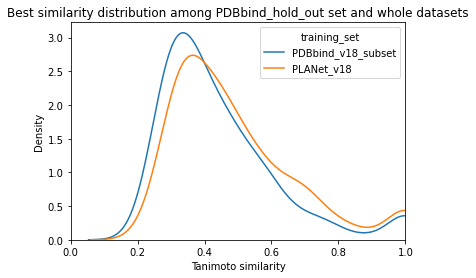

In [79]:
sns.kdeplot(max_simi_for_PDBbind_hold_with_PDBbind_v18)
sns.kdeplot(max_simi_for_PDBbind_hold_with_PLANet_v18)
plt.xlabel("Tanimoto similarity")
plt.xlim(0,1)
plt.title(f'Best similarity distribution among PDBbind_hold_out set and whole datasets')
plt.legend(labels=['PDBbind_v18_subset','PLANet_v18'], title = "training_set")
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/PDBbind_hold_out_with_whole_set.png', dpi=300, bbox_inches='tight')
# plt.close()


In [82]:
PDBbind_v18_simi_1_with_PDBbind_hold_out = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/PDBbind_v18_subset_in_PDBbind_hold_out_2019_subset/simi_1.csv', sep='\t')
len(set(PDBbind_v18_simi_1_with_PDBbind_hold_out['PDBbind_v18_subset_cpnd_name']))

26

In [85]:
PLANet_simi_1_with_PDBbind_hold_out = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/PLANet_v18_in_PDBbind_hold_out_2019_subset/simi_1.csv', sep='\t')
# PLANet_simi_1_with_PDBbind_hold_out
len(set(PLANet_simi_1_with_PDBbind_hold_out['PLANet_v18_cpnd_name']))

38

# PLANet hold out

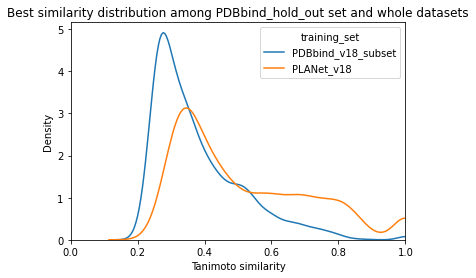

In [80]:
max_simi_for_PLANet_hold_with_PLANet_v18 = calculate_simi(PLANet_hold_out_2019_mols, PLANet_hold_out_2019_mol_fps, PLANet_hold_out_2019, PLANet_v18_mols, PLANet_v18_mol_fps, PLANet_v18, 'PLANet_hold_out_2019', 'PLANet_v18')

max_simi_for_PLANet_hold_with_PDBbind_v18 = calculate_simi(PLANet_hold_out_2019_mols, PLANet_hold_out_2019_mol_fps, PLANet_hold_out_2019, PDBbind_v18_subset_mols, PDBbind_v18_subset_mol_fps, PDBbind_v18_subset, 'PLANet_hold_out_2019', 'PDBbind_v18_subset')

sns.kdeplot(max_simi_for_PLANet_hold_with_PDBbind_v18)
sns.kdeplot(max_simi_for_PLANet_hold_with_PLANet_v18)
plt.xlabel("Tanimoto similarity")
plt.xlim(0,1)
plt.title(f'Best similarity distribution among PDBbind_hold_out set and whole datasets')
plt.legend(labels=['PDBbind_v18_subset','PLANet_v18'], title = "training_set")
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/PLANet_hold_out_with_whole_set.png', dpi=300, bbox_inches='tight')
# plt.close()


In [87]:
PDBbind_v18_simi_1_with_PLANet_hold_out = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/PDBbind_v18_subset_in_PLANet_hold_out_2019/simi_1.csv', sep='\t')
len(set(PDBbind_v18_simi_1_with_PLANet_hold_out['PDBbind_v18_subset_cpnd_name']))

35

In [88]:
PLANet_v18_simi_1_with_PLANet_hold_out = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/similarity/PLANet_v18_in_PLANet_hold_out_2019/simi_1.csv', sep='\t')
len(set(PLANet_v18_simi_1_with_PLANet_hold_out['PLANet_v18_cpnd_name']))

313

# PDBbind_subset_rm_simi_1

In [91]:
len(PDBbind_v18_subset[PDBbind_v18_subset['pdb_id'].isin(list(PDBbind_v18_simi_1_with_PDBbind_hold_out['PDBbind_v18_subset_cpnd_name']) + list(PDBbind_v18_simi_1_with_PLANet_hold_out['PDBbind_v18_subset_cpnd_name']))])

51

In [96]:
PDBbind_v18_subset_rm_simi_1 = PDBbind_v18_subset[~PDBbind_v18_subset['pdb_id'].isin(list(PDBbind_v18_simi_1_with_PDBbind_hold_out['PDBbind_v18_subset_cpnd_name']) + list(PDBbind_v18_simi_1_with_PLANet_hold_out['PDBbind_v18_subset_cpnd_name']))]
PDBbind_v18_subset_rm_simi_1.to_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/rm_all_simi_1/PDBbind_v18_subset_rm_simi_1.csv', sep='\t', index=False)
len(PDBbind_v18_subset_rm_simi_1)

5371

In [97]:
PLANet_v18.columns

Index(['unique_identify', '-logAffi', 'Target_chembl_id', 'Cry_lig_name',
       'Cry_lig_smiles', 'Cry_lig_an', 'Similar_compnd_name',
       'Similar_compnd_smiles', 'Similar_compnd_an', 'Similarity', 'Core_num',
       'Diff_an', 'Part_fix', 'Total_sampled_num', 'Similar_compnd_conform',
       'Total_delta', 'Lig_delta', 'Core_RMSD', 'MolWt', 'MCS_smarts',
       'target_compnd'],
      dtype='object')

In [99]:
PLANet_v18_rm_simi_1 = PLANet_v18[~PLANet_v18['unique_identify'].isin(list(PLANet_simi_1_with_PDBbind_hold_out['PLANet_v18_cpnd_name']) + list(PLANet_v18_simi_1_with_PLANet_hold_out['PLANet_v18_cpnd_name']))]
PLANet_v18_rm_simi_1[['unique_identify', '-logAffi']].to_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/rm_all_simi_1/PLANet_v18_rm_simi_1.csv', sep='\t', index=False)
len(PLANet_v18_rm_simi_1)

63604